In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

#Visualization Tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# AI Workflow Module
from model_classifier import ModelClassifier, CustomClassifier

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Use for saving model 
import joblib

# Environment Parameters

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100 
plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Preparation

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled_v0.csv',index_col=0)
train_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled_v0.csv',index_col=0)
test_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [4]:
# Get the data
rnaseq_df = pd.read_csv('../data/RNASeq/SKCM_DATA_RNASeq.csv', index_col = 0)

# Preprocess genomic data
X = rnaseq_df.T
X.index = [index[0:12] for index in X.index.values]
X.index.names = ['submitter_id']
print(X.shape)
X.head()

(473, 19947)


,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTC1,ACTG1,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,CRISP1,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOBEC1,APOC1,APOC1P1,AQP8,APOC4-APOC2,APOC3,APOC4-APOC2,APOD,APOE,APOH,...,SNORD116-15,SNORD116-16,SNORD116-18,SNORD116-20,SNHG14,SNORD116-23,SNORD116-24,SNORD116-25,SNORD115-2,SNORD116-26,SNORD116-27,SNORD115-3,SNORD115-4,SNORD115-5,SNORD115-6,SNHG14,SNORD115-8,SNORD115-9,SNORD115-10,SNORD115-11,SNHG14,SNORD115-14,SNORD115-16,SNORD115-17,SNORD115-20,SNORD115-22,SNORD115-25,SNHG14,SNORD115-30,SNORD115-31,SNORD115-32,SNORD115-33,SNORD115-35,SNORD115-37,SNORD115-38,SNORD115-39,SNORD115-40,SNORD115-41,SNORD115-44,SNHG14,SNORD116-29,SNORD115-48,FOXD4L2,SNORD115-24,SNORD115-27,SNORD115-28,SNORD115-45,SNORD115-47,DDTL,TLX1NB,CDKN2B-AS1,SIGLEC14,MIMT1,SNHG8,TTTY1B,HAVCR1P1,POM121C,ZSCAN30,RP3-324O17.4,GAGE2E,SNORD119,SNORD121A,SNORD125,GNL3,SNORD105B,SNORD123,SNORD127,SNORD126,SNORD11B,SNORD12B,SNORD111B,TMEM170B,FAM138E,RPL17,SNORA84,SNORA36C,SNORA38B,SNORA70B,SNORA70C,SNORA11B,SNORA11C,SNORA11E,HOTAIR,ZGLP1,FAM86JP,FMR1-AS1,RP11-359E10.1,EGOT,GHRLOS,RP11-93B14.5,C10orf131,DPPA2P2,RP11-379K17.4,TMPO-AS1,RP11-713P17.3,DNM1P35,TRAPPC3L,FAM225B,CTAGE9,C19orf71,ACVR2B-AS1,HPN-AS1,OST4,LINC00476,SRRM2-AS1,GPR158-AS1,LINC01003,ZBTB42,KTN1-AS1,KHDC1L,C1orf68,NRADDP,GABPB1-AS1,FAM106B,RPL19P12,ZNF37BP,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,AC005176.2,URAHP,FTLP10,HSFX2,SNAP47,RP5-1027G4.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,KRTAP25-1,RRN3P3,FAM66E,AC009501.4,NPIPB5,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J,NBPF10,FCGR1B,FAM99B,KRTAP4-7,GOLGA8G,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5,FAM66D,FAM182B,GOLGA8EP,FAM95B1,FAM182B,UBE2Q2P2,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2,TEN1,POLR2J3,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,RNU6ATAC,SCARNA9,TEX36-AS1,PATE3,SRRM5,C19orf69,C17orf96,PRICKLE4,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,RP11-789C17.3,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [5]:
# Get genes in train data
genes = set(X.columns.values).intersection(set(train_df.columns.values))
list(genes)

['CTF1',
 'ERCC6L2',
 'GRID2',
 'ZBED6CL',
 'STMN1',
 'ACOX1',
 'PGAP3',
 'FAM109B',
 'GLT6D1',
 'SLC52A3',
 'PSG3',
 'CIB1',
 'FRK',
 'NANOS2',
 'GUSBP11',
 'EXO1',
 'UROS',
 'SLC51B',
 'COMMD10',
 'SLC27A1',
 'TIRAP',
 'MYO6',
 'PI16',
 'GRAP',
 'OR2T4',
 'RNF150',
 'ARSH',
 'KLF4',
 'CAMSAP1',
 'PCDH19',
 'ZFHX4',
 'RNF144A',
 'GRIA3',
 'RNF44',
 'TP53RK',
 'LDOC1L',
 'EEF1D',
 'TNRC18',
 'ZNF274',
 'TSR3',
 'MRPL32',
 'PRDX3',
 'ABL2',
 'PLAC8L1',
 'C1orf106',
 'HSPA13',
 'RGS17',
 'PGK1',
 'SMCO4',
 'KIAA1377',
 'HSPB11',
 'C1orf115',
 'FAM19A5',
 'SPTA1',
 'MAP6',
 'RP11-3N2.13',
 'FAM138E',
 'ASAP2',
 'HBB',
 'FAM3B',
 'ZNF334',
 'LHPP',
 'CARS2',
 'TBC1D32',
 'ZNF133',
 'TPTEP1',
 'ALYREF',
 'C5orf51',
 'CETN1',
 'ARHGAP42',
 'IL12RB2',
 'CNOT6',
 'TMC4',
 'LPXN',
 'FBXO28',
 'SCN7A',
 'OTP',
 'STK39',
 'ABHD13',
 'CSMD1',
 'WNT5B',
 'TECTB',
 'SYNJ2',
 'LYST',
 'TIMM10B',
 'NEUROD2',
 'FAM27L',
 'UBQLN2',
 'SLC10A1',
 'CBLN4',
 'KRTAP3-3',
 'OR4F15',
 'ZNF589',
 'ANKRD22',
 'P

### Feature Selection

In [6]:
features = list(genes)

model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'pathologic_stage', 
    label_values = ['Early Stage', 'Metastatic'],
    features = features, 
    label_binarizer = False)

## Model Development

In [7]:
# Logistic Regression

lr_pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    }
]

# Support Vector Machines - Linear Kernel

svm_linear_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    }
]

# Support Vector Machines - Polynomial Kernel

svm_poly_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Radial Basis Kernel


svm_rbf_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Sigmoid Kernel


svm_sigmoid_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Naive Bayes

gnb_pipeline_params = [
    {   
        'clf__estimator': [GaussianNB(priors = None)], 
    },
]

# Random Forest

rf_pipeline_params = [
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]  
    },
]

# All Models in one pipeline without PCA

pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

# All Models in one pipeline with PCA


pca_pipeline_params = [
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],        
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': [10.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': [0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [RandomForestClassifier(random_state=1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

### Model Performance [Without PCA]

#### Logistic Regression

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.164):
{'clf__estimator': LogisticRegression(C=0.01, max_iter=10000, solver='liblinear'), 'clf__estimator__C': 0.01, 'clf__estimator__penalty': 'l2'}

Training Performance:
AUC score: 1.0
LogLoss score: 0.20675772489282268
Accuracy: 1.0
f1 macro: 1.0
f1 micro: 1.0
f1 weighted: 1.0
Precision macro: 1.0
Precision micro: 1.0
Precision weighted: 1.0
Recall macro: 1.0
Recall micro: 1.0
Recall weighted: 1.0

Validation Performance:
AUC score: 0.7068965517241379
LogLoss score: 0.9827392816498126
Accuracy: 0.6585365853658537
f1 macro: 0.4879064234734338
f1 micro: 0.6585365853658537
f1 weighted: 0.7498597706040503
Precision macro: 0.09562524196670538
Precision micro: 0.09562524196670538
Precision weighted: 0.09562524196670538
Recall macro: 0.6847290640394088
Recall micro: 0.6585365853658537
Recall weighted: 0.6585365853658537


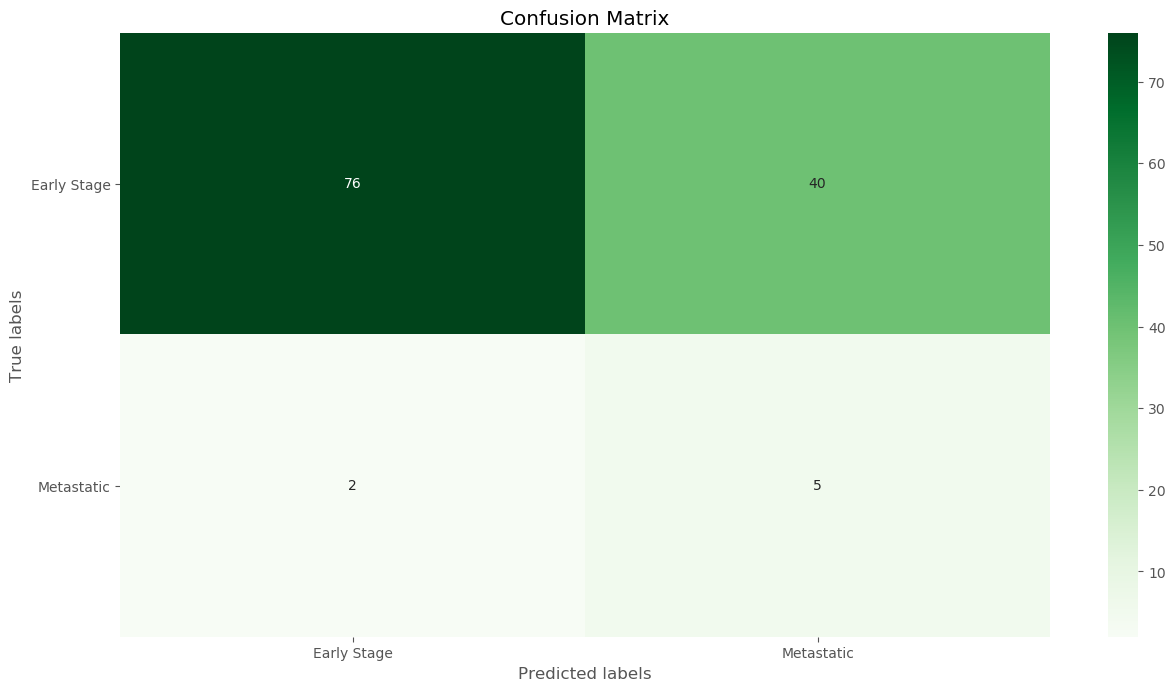

In [8]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(lr_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Support Vector Machines - Linear Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.000):
{'clf__estimator': SVC(decision_function_shape='ovo', kernel='linear', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 1.0
LogLoss score: 0.1992076396420215
Accuracy: 1.0
f1 macro: 1.0
f1 micro: 1.0
f1 weighted: 1.0
Precision macro: 1.0
Precision micro: 1.0
Precision weighted: 1.0
Recall macro: 1.0
Recall micro: 1.0
Recall weighted: 1.0

Validation Performance:
AUC score: 0.6896551724137931
LogLoss score: 0.22797170152982132
Accuracy: 0.9349593495934959
f1 macro: 0.4831932773109244
f1 micro: 0.9349593495934959
f1 weighted: 0.9113889458222313
Precision macro: 0.056910569105691054
Precision micro: 0.056910569105691054
Precision weighted: 0.056910569105691054
Recall macro: 0.4956896551724138
Recall micro: 0.9349593495934959
Recall weighted: 0.9349593495934959


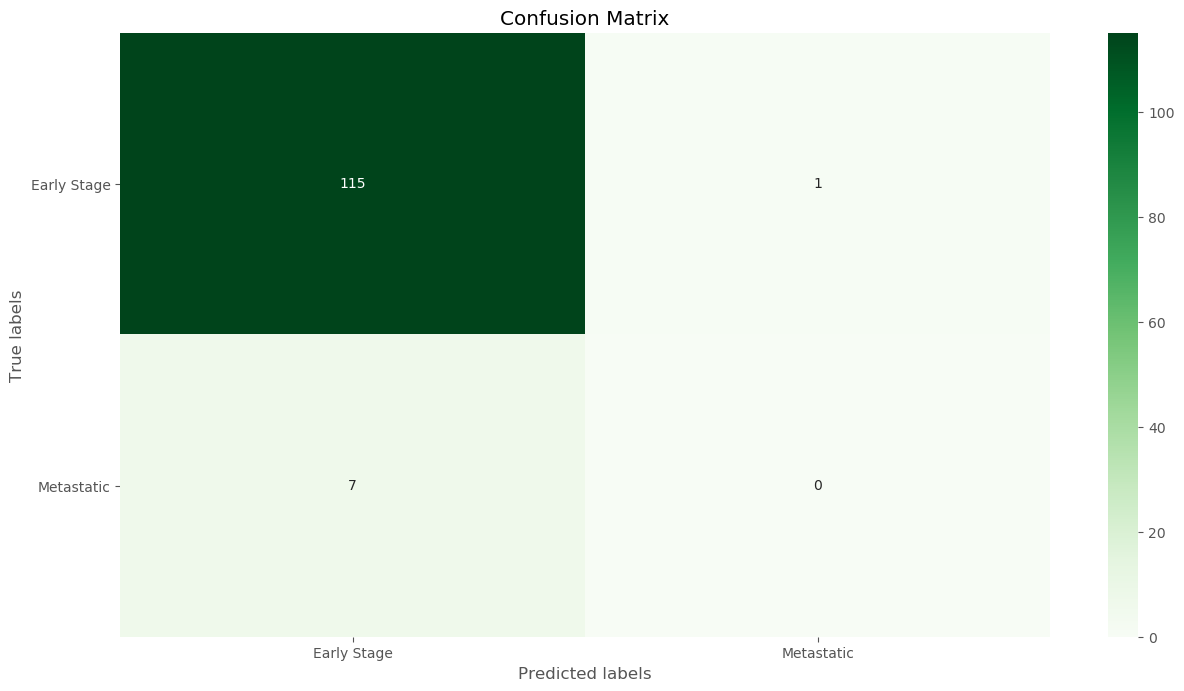

In [9]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_linear_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Support Vector Machines - Polynomial Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.000):
{'clf__estimator': SVC(decision_function_shape='ovo', kernel='poly', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 0.0
LogLoss score: 0.2541770421300908
Accuracy: 0.958041958041958
f1 macro: 0.6558363417569193
f1 micro: 0.958041958041958
f1 weighted: 0.9445103632829265
Precision macro: 0.24195804195804196
Precision micro: 0.24195804195804196
Precision weighted: 0.24195804195804196
Recall macro: 0.6
Recall micro: 0.958041958041958
Recall weighted: 0.958041958041958

Validation Performance:
AUC score: 0.3226600985221675
LogLoss score: 0.4847220222316461
Accuracy: 0.9349593495934959
f1 macro: 0.4831932773109244
f1 micro: 0.9349593495934959
f1 weighted: 0.9113889458222313
Precision macro: 0.056910569105691054
Precision micro: 0.056910569105691054
Precision weighted: 0.056910569105691054
Recall macro: 0.49568

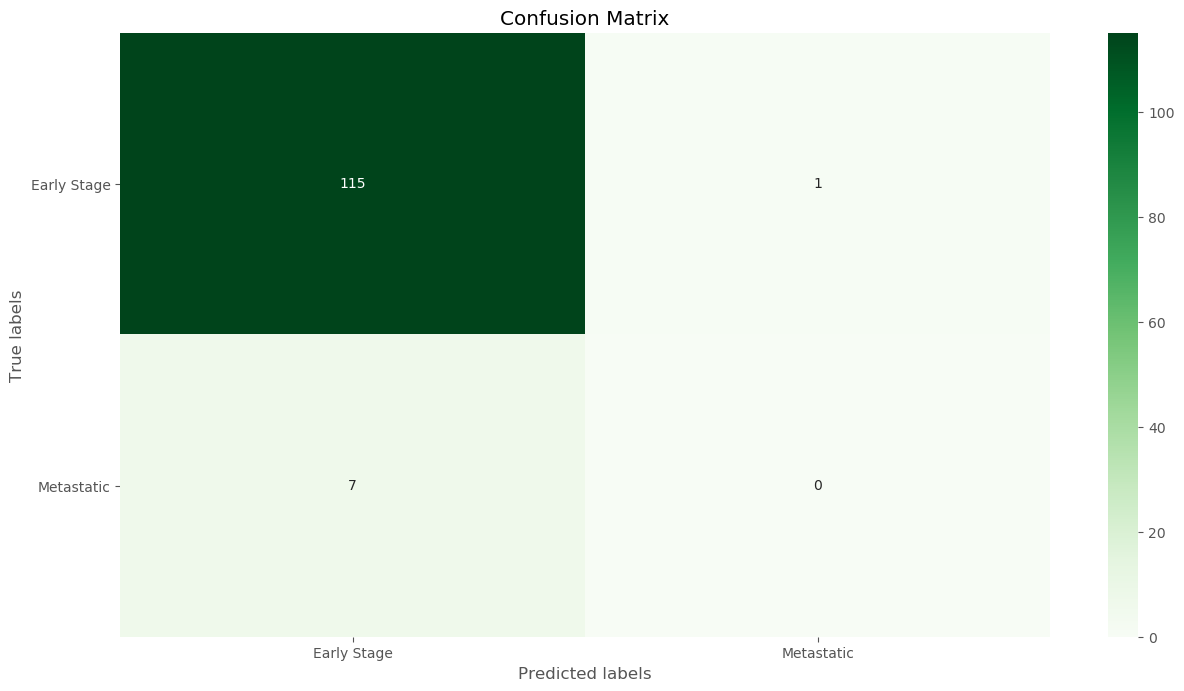

In [10]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_poly_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Support Vector Machines - Radial Basis Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.000):
{'clf__estimator': SVC(decision_function_shape='ovo', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 0.0
LogLoss score: 0.57305447951201
Accuracy: 0.9475524475524476
f1 macro: 0.48653500897666074
f1 micro: 0.9475524475524475
f1 weighted: 0.9220348771515738
Precision macro: 0.05244755244755245
Precision micro: 0.05244755244755245
Precision weighted: 0.05244755244755245
Recall macro: 0.5
Recall micro: 0.9475524475524476
Recall weighted: 0.9475524475524476

Validation Performance:
AUC score: 0.4901477832512315
LogLoss score: 0.22700507358134847
Accuracy: 0.943089430894309
f1 macro: 0.48535564853556484
f1 micro: 0.943089430894309
f1 weighted: 0.9154675647174881
Precision macro: 0.056910569105691054
Precision micro: 0.056910569105691054
Precision weighted: 0.056910569105691054
Recall macro: 0.5
Recall micro: 0

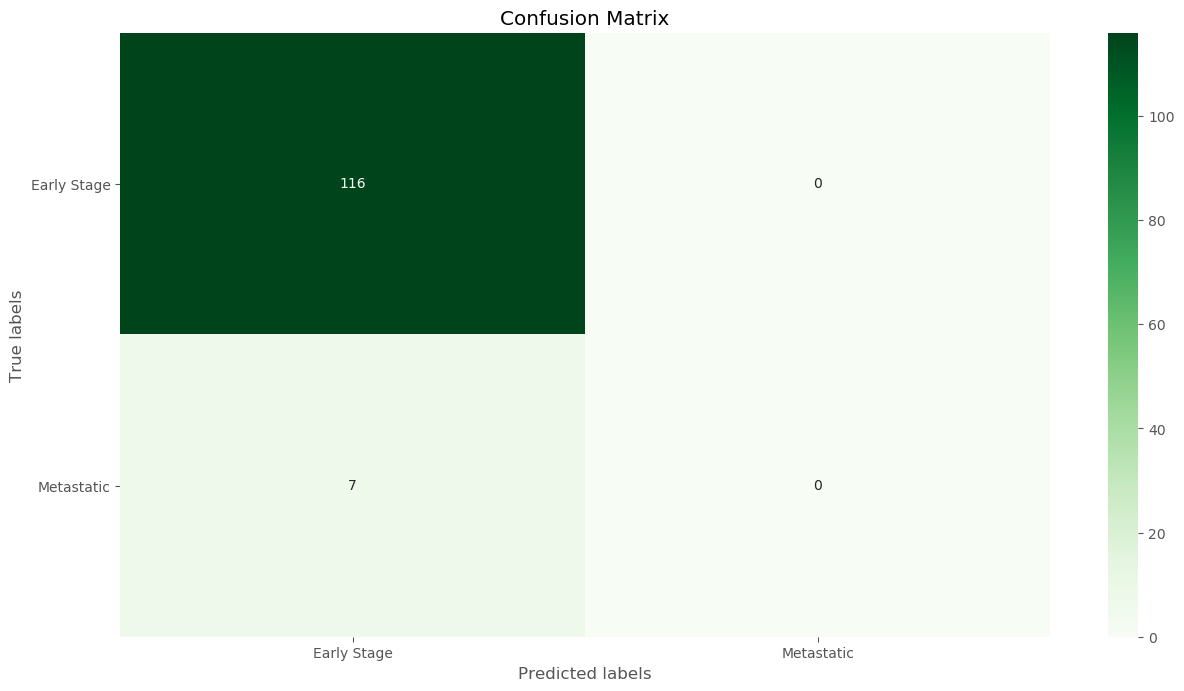

In [11]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_rbf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Support Vector Machines - Sigmoid Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.000):
{'clf__estimator': SVC(decision_function_shape='ovo', kernel='sigmoid', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 0.9795817958179582
LogLoss score: 0.158619475824951
Accuracy: 0.9475524475524476
f1 macro: 0.48653500897666074
f1 micro: 0.9475524475524475
f1 weighted: 0.9220348771515738
Precision macro: 0.05244755244755245
Precision micro: 0.05244755244755245
Precision weighted: 0.05244755244755245
Recall macro: 0.5
Recall micro: 0.9475524475524476
Recall weighted: 0.9475524475524476

Validation Performance:
AUC score: 0.5751231527093595
LogLoss score: 0.24062148376719814
Accuracy: 0.9349593495934959
f1 macro: 0.4831932773109244
f1 micro: 0.9349593495934959
f1 weighted: 0.9113889458222313
Precision macro: 0.056910569105691054
Precision micro: 0.056910569105691054
Precision weighted: 0.05691056910569105

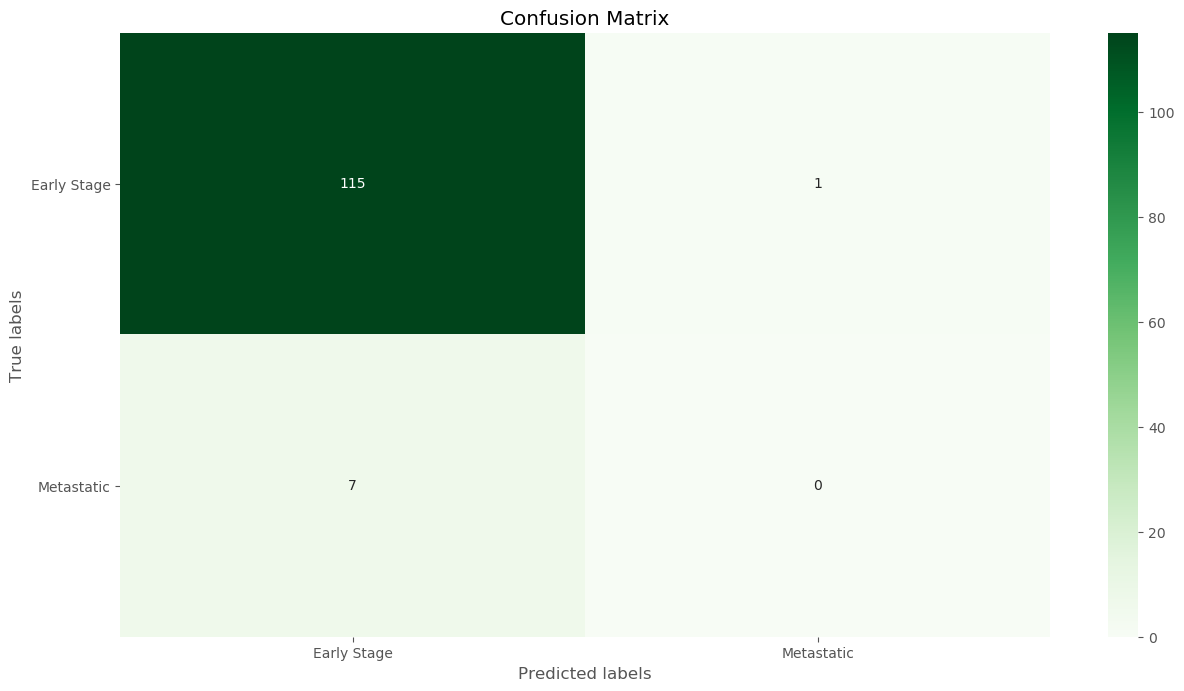

In [12]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_sigmoid_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Naive Bayes

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameter (CV score=0.000):
{'clf__estimator': GaussianNB()}

Training Performance:
AUC score: 1.0
LogLoss score: 9.992007221626415e-16
Accuracy: 1.0
f1 macro: 1.0
f1 micro: 1.0
f1 weighted: 1.0
Precision macro: 1.0
Precision micro: 1.0
Precision weighted: 1.0
Recall macro: 1.0
Recall micro: 1.0
Recall weighted: 1.0

Validation Performance:
AUC score: 0.5
LogLoss score: 1.9656214208485763
Accuracy: 0.943089430894309
f1 macro: 0.48535564853556484
f1 micro: 0.943089430894309
f1 weighted: 0.9154675647174881
Precision macro: 0.056910569105691054
Precision micro: 0.056910569105691054
Precision weighted: 0.056910569105691054
Recall macro: 0.5
Recall micro: 0.943089430894309
Recall weighted: 0.943089430894309


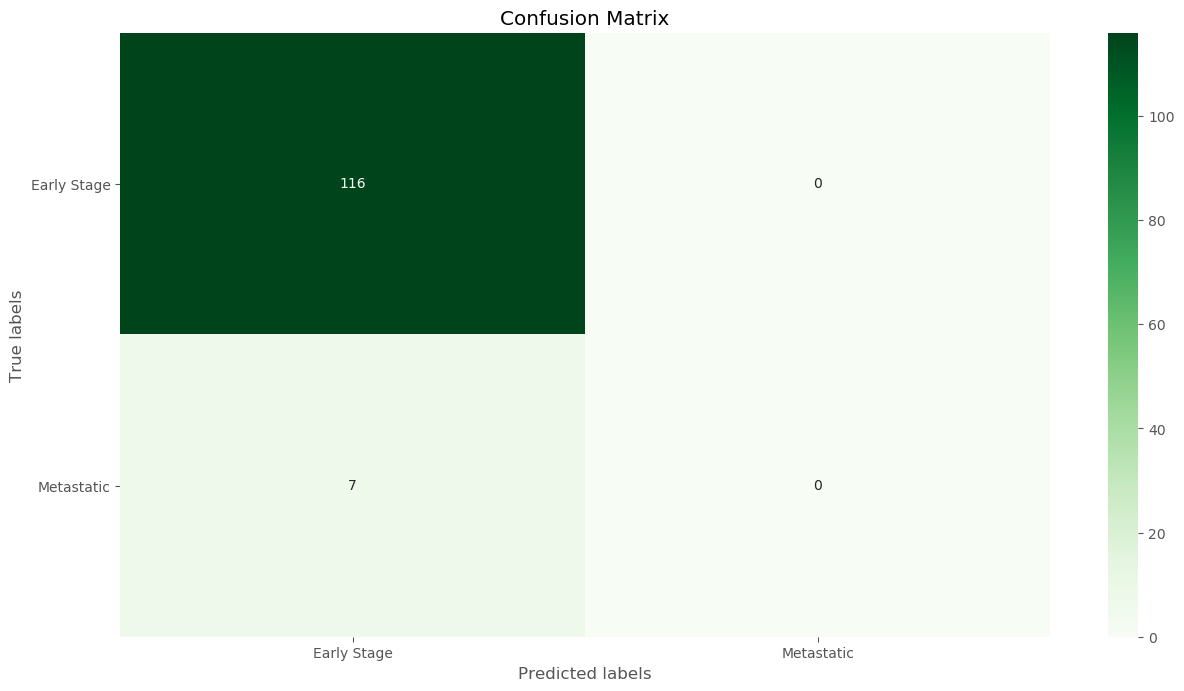

In [13]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(gnb_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Random Forest

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.000):
{'clf__estimator': RandomForestClassifier(max_features=0.6, min_samples_leaf=6, n_estimators=30,
                       random_state=1), 'clf__estimator__max_features': 0.6, 'clf__estimator__min_samples_leaf': 6, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 30}

Training Performance:
AUC score: 1.0
LogLoss score: 0.09499231668428411
Accuracy: 0.9475524475524476
f1 macro: 0.48653500897666074
f1 micro: 0.9475524475524475
f1 weighted: 0.9220348771515738
Precision macro: 0.05244755244755245
Precision micro: 0.05244755244755245
Precision weighted: 0.05244755244755245
Recall macro: 0.5
Recall micro: 0.9475524475524476
Recall weighted: 0.9475524475524476

Validation Performance:
AUC score: 0.6286945812807881
LogLoss score: 0.21686788975028556
Accuracy: 0.943089430894309
f1 macro: 0.48535564853556484
f1 micro: 0.943089430894309
f1 weighted: 0.9154675647174881
Precision ma

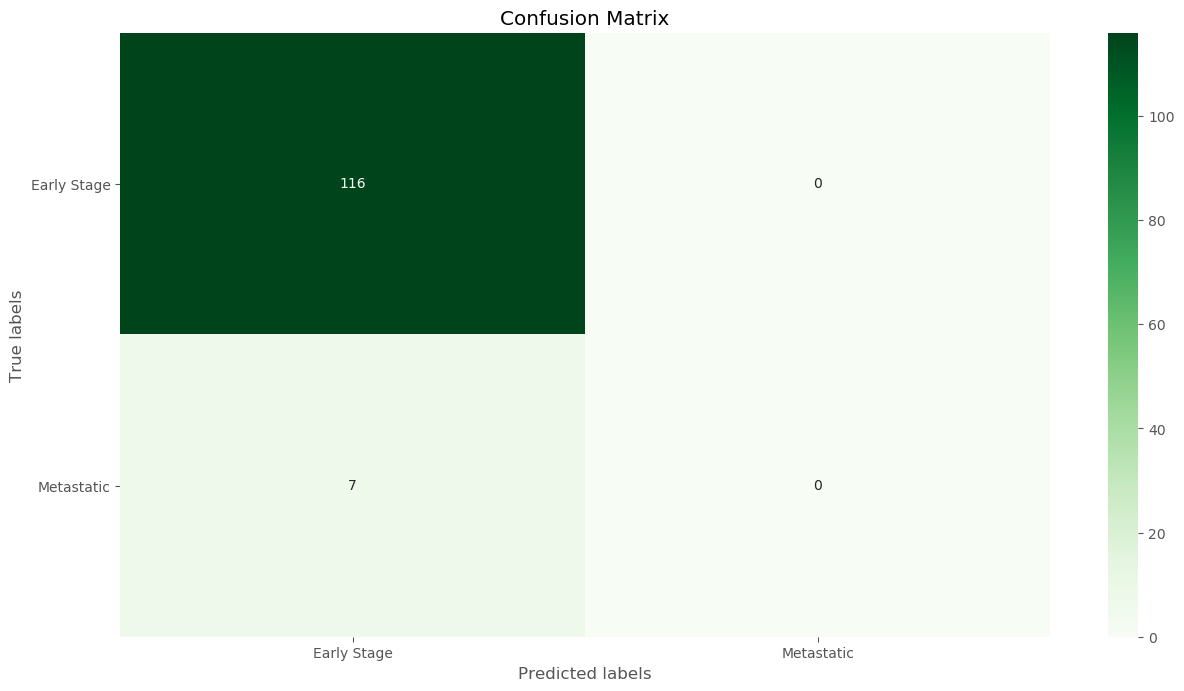

In [15]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(rf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### All Models in one pipeline without PCA

Fitting 2 folds for each of 569 candidates, totalling 1138 fits
Best parameter (CV score=0.164):
{'clf__estimator': LogisticRegression(C=0.01, max_iter=10000, solver='liblinear'), 'clf__estimator__C': 0.01, 'clf__estimator__penalty': 'l2'}

Training Performance:
AUC score: 1.0
LogLoss score: 0.20675772489282268
Accuracy: 1.0
f1 macro: 1.0
f1 micro: 1.0
f1 weighted: 1.0
Precision macro: 1.0
Precision micro: 1.0
Precision weighted: 1.0
Recall macro: 1.0
Recall micro: 1.0
Recall weighted: 1.0

Validation Performance:
AUC score: 0.7068965517241379
LogLoss score: 0.9827392816498126
Accuracy: 0.6585365853658537
f1 macro: 0.4879064234734338
f1 micro: 0.6585365853658537
f1 weighted: 0.7498597706040503
Precision macro: 0.09562524196670538
Precision micro: 0.09562524196670538
Precision weighted: 0.09562524196670538
Recall macro: 0.6847290640394088
Recall micro: 0.6585365853658537
Recall weighted: 0.6585365853658537


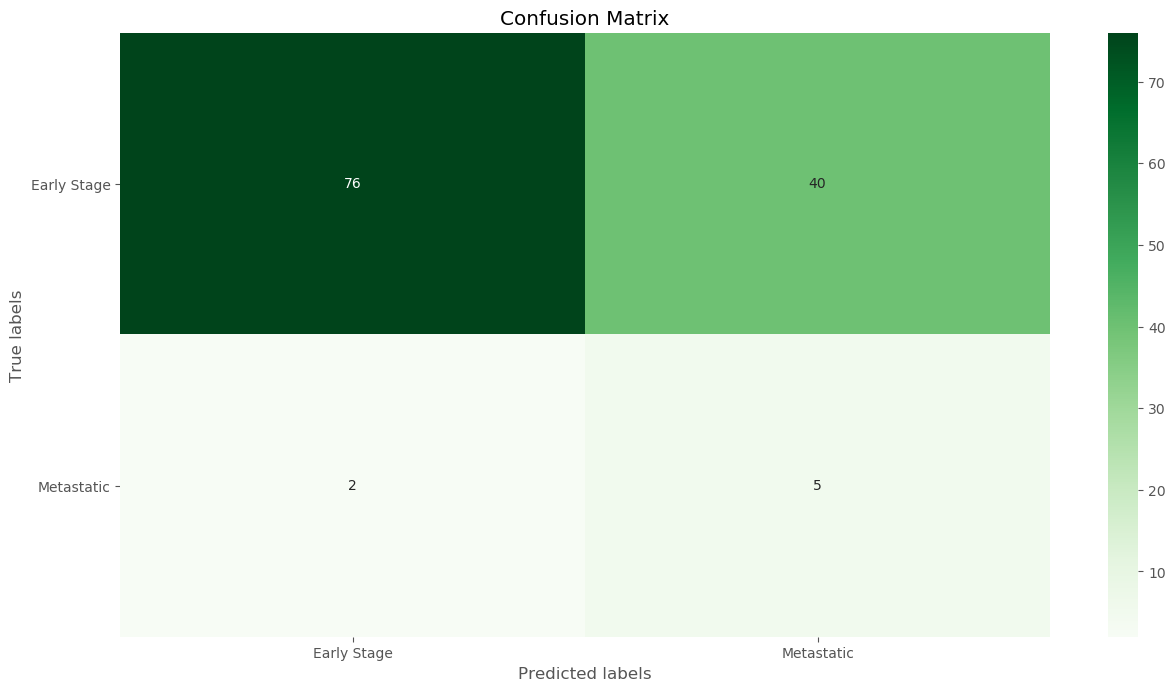

In [16]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

### Model Performance [With PCA]

In [18]:
# grid_search_parameters = {
#     "n_jobs": 4, 
#     "cv": 2, 
#     "return_train_score": False, 
#     "verbose": 3, 
#     "scoring": ["accuracy", "f1"],
#     "refit": "f1"
# }

# model_pca = model_classifier.classifier(pca_pipeline_params, grid_search_parameters, pca = True)

# model_classifier.classifier_metrics(model_pca, confusion_matrix = True)

### Saving plots of Random Forest Estimators

In [19]:
# from subprocess import check_call
# from sklearn.tree import export_graphviz

# # Get the final model
# final_model = model[1].estimator

# for index in range(0, final_model.n_estimators):
#     export_graphviz(final_model.estimators_[index],
#                      out_file="../data/rf_plot/rf_{}.dot".format(index),
#                      feature_names = model_classifier.train_features.columns, 
#                      class_names = model_classifier.label_values,
#                      filled = True)


# for index in range(0, final_model.n_estimators):
#     check_call(['dot','-Tpng',"../data/rf_plot/rf_{}.dot".format(index),'-o',"../data/rf_plot/rf_{}.png".format(index)])


### Getting weights of each Features

In [20]:
# rf_weights = pd.DataFrame(final_model.feature_importances_)
# rf_weights.index = model_classifier.train_features.columns
# rf_weights.columns = ["weights"]
# rf_weights.sort_values(by=['weights'], inplace=True, ascending=False)
# rf_weights.to_csv('../data/Melanoma_RF_weights_all_data.csv')
# rf_weights

### Save the model for deployment

In [24]:
joblib.dump(model, 'melanoma_genomic_pathologic_stage_classifier.pkl', compress=9)

['melanoma_genomic_pathologic_stage_classifier.pkl']

In [25]:
# Retrieve model
melanoma_classifier_model = joblib.load('melanoma_genomic_pathologic_stage_classifier.pkl')